## Music Recommendation System

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
%matplotlib inline

#### Loading the Dataset

In [21]:
df1 = pd.read_csv("data.csv")

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [23]:
df1.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [24]:
df1.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [25]:
df1.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [26]:
df1.shape

(170653, 19)

In [27]:
# df1 preprocessing
df1['artists'] = df1['artists'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))

#### Visualising the distribution of the valence

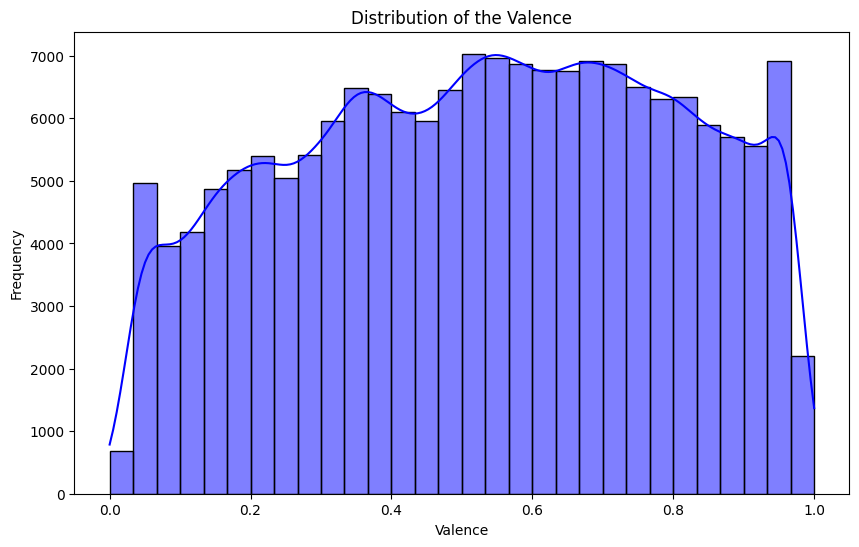

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df1['valence'], bins=30, kde= True, color='blue')
plt.title('Distribution of the Valence')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.show()

#### Distribution of the Danceability

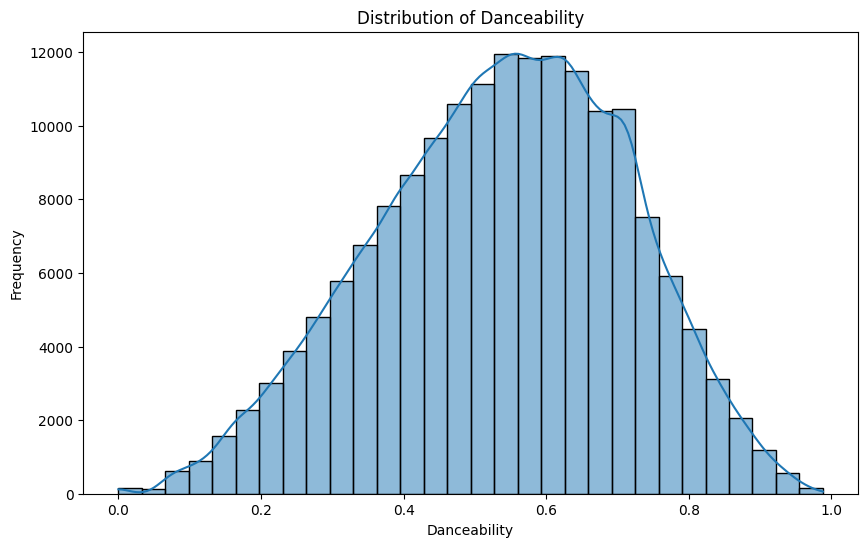

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['danceability'], bins=30, kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

#### Getting the numerical columns

In [30]:
numerical_columns = df1.select_dtypes(include='number').columns
numerical_columns

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling excluding 'year'
numerical_cols = ['valence', 'acousticness', 'danceability', 'duration_ms',
                  'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
                  'mode', 'popularity', 'speechiness', 'tempo']

# Apply Standard Scaler to these columns
scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])
numerical_df = df1[numerical_columns]

In [32]:
df1.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,-1.782825,1921,1.276187,"[Sergei Rachmaninoff, James Levine, Berliner P...",-1.467013,4.763146,-1.013988,0,4BJqT0PrAfrxzMOxytFOIz,2.268102,1.365588,2.626719,-1.514237,0.643912,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",-1.256808,1921,-0.379706,-1.169307
1,1.650688,1921,0.611347,[Dennis Day],1.598779,-0.399747,-0.528270,0,7xPhfUan2yNtyFG0cUWkt8,-0.532771,0.512123,-0.262229,-0.170766,0.643912,Clancy Lowered the Boom,-1.210993,1921,1.945481,-1.821180
2,-1.858821,1921,1.220340,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,-1.188820,2.133824,-1.182122,0,1o6I8BglA6ylDMrIELygv1,2.379754,-0.625830,-0.599749,-0.593551,0.643912,Gati Bali,-1.210993,1921,-0.396297,-0.212404
3,-1.381564,1921,1.236296,[Frank Parker],-1.489722,-0.166101,-0.647832,0,3ftBPsC5vPBKxYSee08FDH,-0.532682,-0.056853,1.002043,0.377680,0.643912,Danny Boy,-1.302624,1921,-0.387080,-0.545537
4,-1.047180,1921,1.209703,[Phil Regan],-0.677855,-0.509485,-1.081242,0,4d6HGyGT8e121BsdKmw9v6,-0.532765,-0.625830,0.132499,0.240788,0.643912,When Irish Eyes Are Smiling,-1.348440,1921,-0.371104,-0.494867


#### Correlation matrix

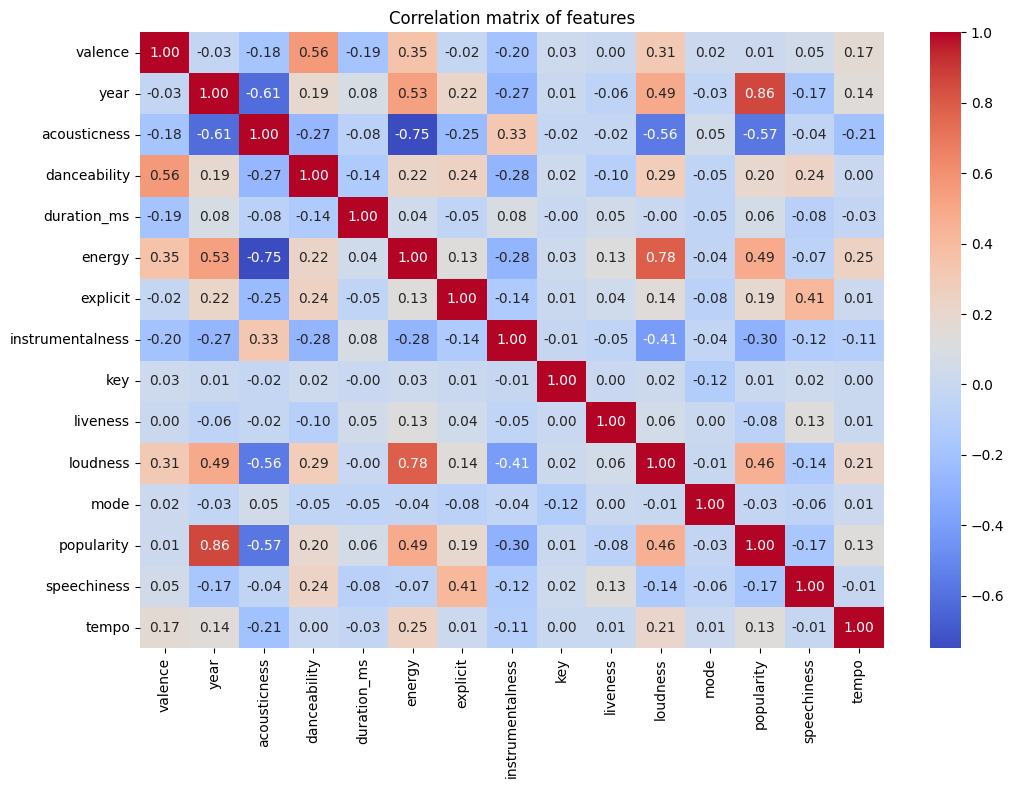

In [33]:
plt.figure(figsize=(12,8))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix of features")
plt.show()

#### Popularity vs Energy

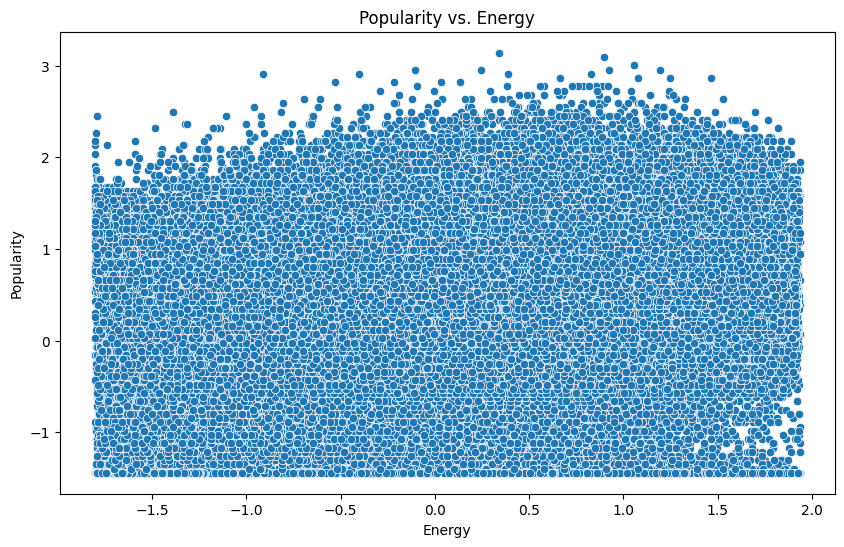

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', data=df1)
plt.title('Popularity vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

#### Average valence over the years

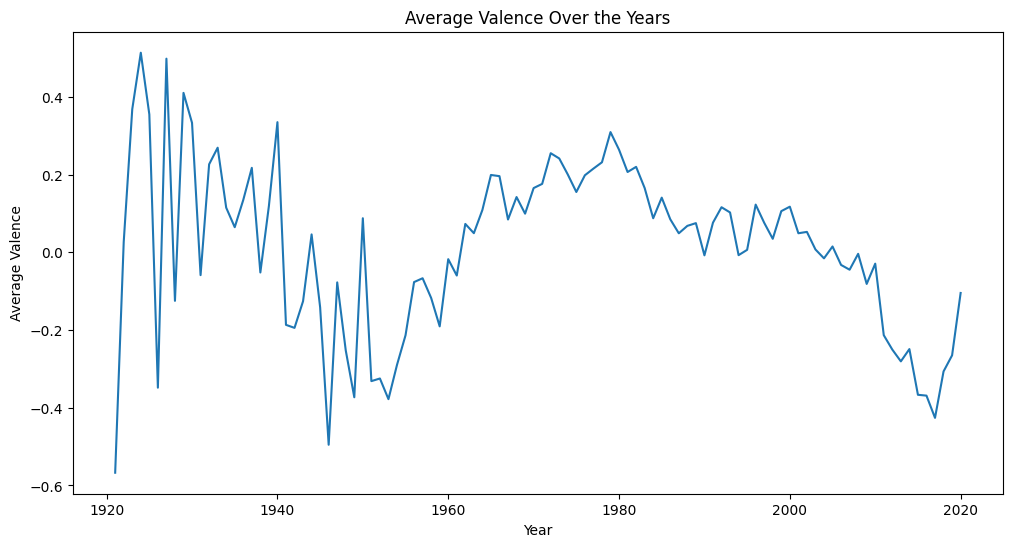

In [35]:
plt.figure(figsize=(12, 6))
df1.groupby('year')['valence'].mean().plot()
plt.title('Average Valence Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.show()


#### Average Energy of the Years

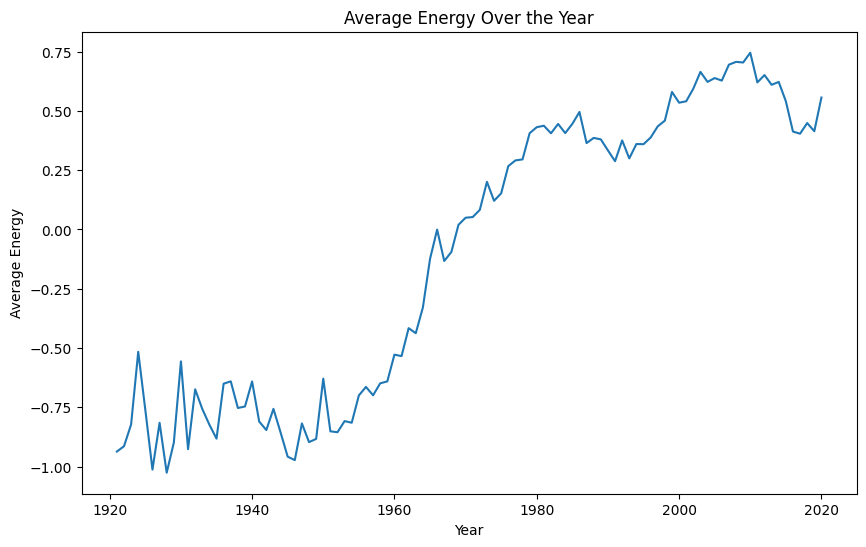

In [36]:
plt.figure(figsize=(10,6))
df1.groupby('year')['energy'].mean().plot()
plt.title('Average Energy Over the Year')
plt.xlabel('Year')
plt.ylabel('Average Energy')
plt.show()

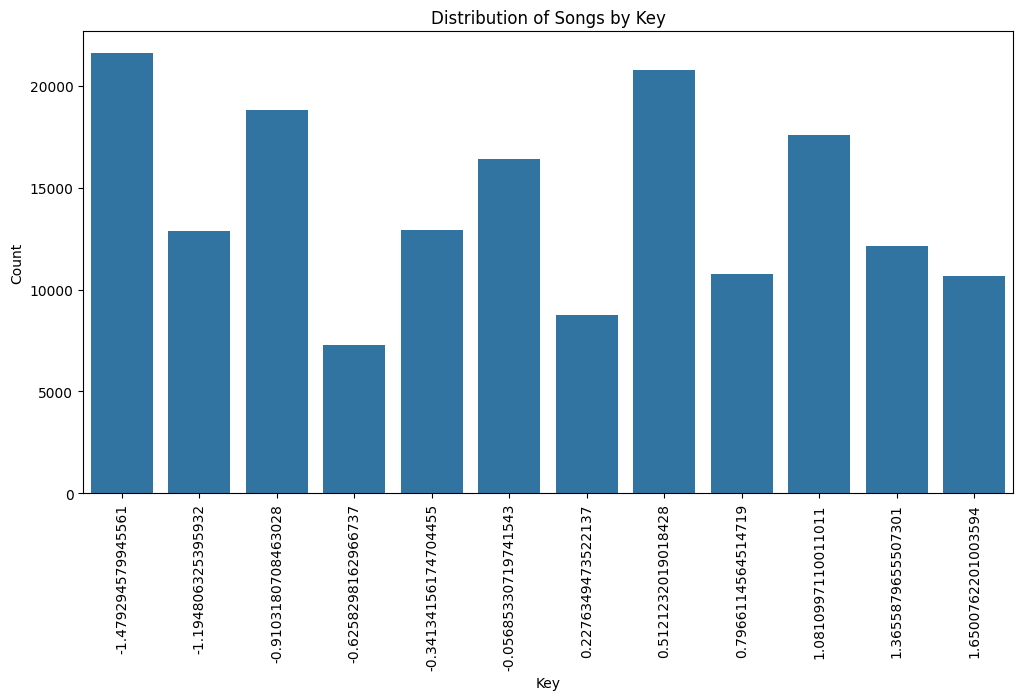

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='key', data=df1)
plt.xticks(rotation=90)
plt.title('Distribution of Songs by Key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

#### Explicit Content Proportion

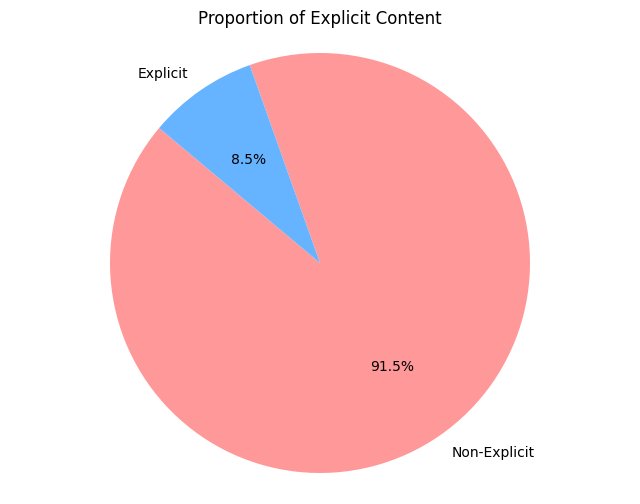

In [38]:
plt.figure(figsize=(8, 6))
labels = ['Non-Explicit', 'Explicit']
sizes = df1['explicit'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.axis('equal')
plt.title('Proportion of Explicit Content')
plt.show()


#### Average Tempo by Year

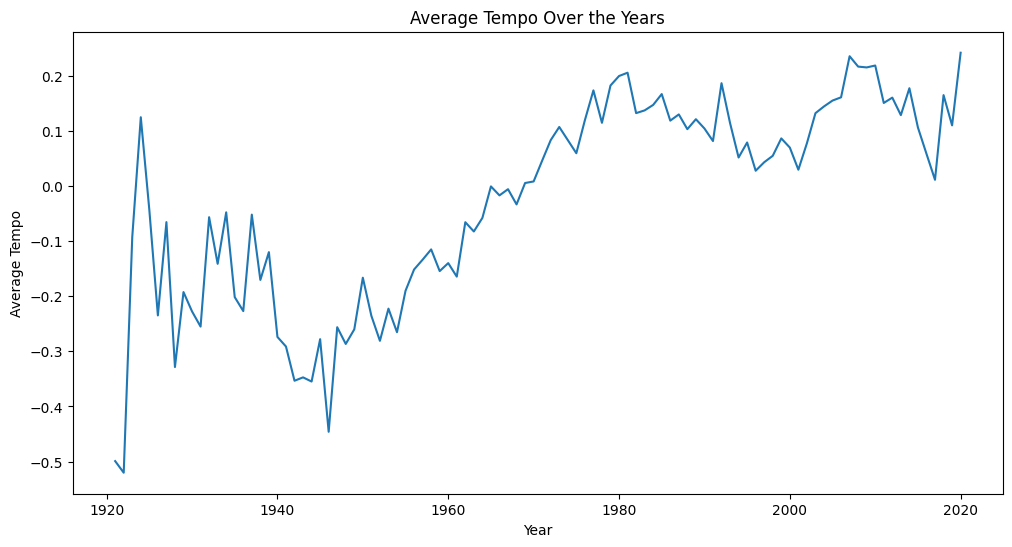

In [39]:
plt.figure(figsize=(12, 6))
df1.groupby('year')['tempo'].mean().plot()
plt.title('Average Tempo Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Tempo')
plt.show()

### Buildig the Recommendation System

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

#### Feature extraction for the recommendation model

In [42]:
features = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']
X = df1[features]

##### Normalising the data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Fitting the KNN model

In [45]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(X_scaled)

NearestNeighbors(algorithm='brute', metric='cosine')

##### Making the function to get the recommendation

In [46]:
def get_recommendations(name, n_recommendations=10):
    # Get the index of the song that matches the name
    idx = df1.index[df1['name'] == name][0]

    # Find the k nearest neighbors
    distances, indices = knn.kneighbors(X_scaled[idx].reshape(1, -1), n_neighbors=n_recommendations+1)

    # Get the indices of the most similar songs
    song_indices = indices.flatten()[1:]  # Exclude the first one as it is the input song itself

    # Return the top n most similar songs
    return df1[['name', 'artists']].iloc[song_indices]

# Example: Get recommendations for a specific song
print(get_recommendations("Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve"))

                                                     name  \
39      Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
1633    Années de pèlerinage, Première année (Suisse),...   
109097  Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
39041   Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
156029               Polonaise-Fantaisie in A-Flat, Op.61   
141492               Polonaise-Fantaisie in A-Flat, Op.61   
22258   String Quartet No. 15 in G major D.887 (2006 D...   
40265   Beethoven: Symphony No. 9 in D Minor, Op. 125 ...   
77541   Symphony No. 4 in G Major: III. Ruhevoll, poco...   
1677    Sonata for Piano in B Minor, S. 178: III. Alle...   

                                                  artists  
39      [Sergei Rachmaninoff, James Levine, Berliner P...  
1633                     [Franz Liszt, Vladimir Horowitz]  
109097  [Sergei Rachmaninoff, Vladimir Horowitz, New Y...  
39041   [Sergei Rachmaninoff, Vladimir Horowitz, New Y...  
156029                  [Fré

### Evaluating the model

In [47]:
# Assuming you have a list of test songs for evaluation
test_songs = ["Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve", "Clancy Lowered the Boom"]

# Get recommendations for each test song and print them
for song in test_songs:
    print(f"Recommendations for '{song}':")
    print(get_recommendations(song))
    print()

Recommendations for 'Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve':
                                                     name  \
39      Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
1633    Années de pèlerinage, Première année (Suisse),...   
109097  Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
39041   Piano Concerto No. 3 in D Minor, Op. 30: III. ...   
156029               Polonaise-Fantaisie in A-Flat, Op.61   
141492               Polonaise-Fantaisie in A-Flat, Op.61   
22258   String Quartet No. 15 in G major D.887 (2006 D...   
40265   Beethoven: Symphony No. 9 in D Minor, Op. 125 ...   
77541   Symphony No. 4 in G Major: III. Ruhevoll, poco...   
1677    Sonata for Piano in B Minor, S. 178: III. Alle...   

                                                  artists  
39      [Sergei Rachmaninoff, James Levine, Berliner P...  
1633                     [Franz Liszt, Vladimir Horowitz]  
109097  [Sergei Rachmaninoff, Vladimir Horowitz, New Y...  


## Song recommender system

Enter the song name from the data and it will recommend the similar songs to that

In [52]:
# Test with a specific song
song_name = input("Enter the song name: ")
recommendations = get_recommendations(song_name)

print(f"Recommendations for '{song_name}':")
recommendations

Recommendations for 'Danny Boy':


,name,artists
79469,I Need,[Ella Fitzgerald]
25753,I Wished On The Moon,[Ella Fitzgerald]
63762,A Taste Of Honey,[Julie London]
158601,The Loveliest Night Of The Year,[Connie Francis]
132157,Golondrina Presumida,[Vicente Fernández]
26075,Someone To Watch Over Me,[Sarah Vaughan]
112014,"Puccini: Madama Butterfly, Act 2: ""Io so che a...","[Giacomo Puccini, Nicolai Gedda, Herbert von K..."
25432,Love - You Didn't Do Right By Me (with Paul We...,"[Rosemary Clooney, Paul Weston And His Orchestra]"
7736,An Affair to Remember (Our Love Affair) (with ...,"[Vic Damone, Percy Faith & His Orchestra]"
113982,Galway Bay,[John Gary]
